<a href="https://colab.research.google.com/github/abhirbhandary/Python/blob/main/Housing_price_prediction_competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <span style="color:red">**House Prices - Advanced Regression Techniques**</span>

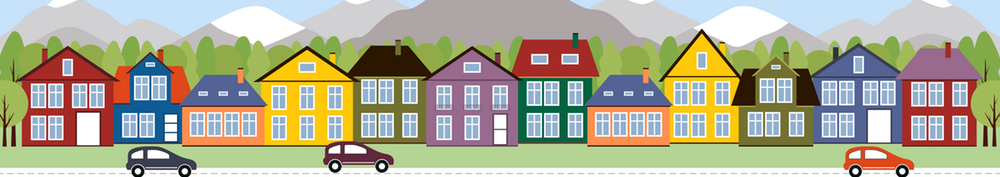

### 1.&nbsp;Import libraries and files 💾

we'll be using the Housing dataset

In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None) # to see all coloumns
# Houses
url = "https://drive.google.com/file/d/1TQ_zWkrv6WfHxBc1O-Uc2ez-8OVUWsrD/view?usp=sharing" # data
path = "https://drive.google.com/uc?export=download&id="+url.split("/")[-2]
housing = pd.read_csv(path)

In [ ]:
# Kaggle test/validation data
url = "https://drive.google.com/file/d/1et4O7xN5bPP4b_C8GJto0_j7uIwIYf1e/view?usp=sharing"
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
val_data_full = pd.read_csv(path)

In [ ]:
# read in full (labelled) dataset to create a model
housing.head(5)

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7            5       2003   
1       Norm     1Fam     1Story            6            8       1976   
2       Norm     1Fam     2Story            7            5       2001   
3       Norm     1Fam     2Story            7            5       1915   
4       Norm     1Fam     2Story            8            5       2000   

   YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
0          2003     Gable  CompShg     VinylSd     VinylSd    BrkFace   
1          1976     Gable  CompShg     MetalSd     MetalSd       None   
2          2002     Gable  CompShg     VinylSd     VinylSd    BrkFace   
3          1970     Gable  CompShg     Wd Sdng     Wd Shng       None   
4          2000     Gable  CompShg     VinylSd     VinylSd    BrkFace   

   MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond BsmtExposure  \
0       196.0        Gd        TA      PConc       Gd       TA           No   
1         0.0        TA        TA     CBlock       Gd       TA           Gd   
2       162.0        Gd        TA      PConc       Gd       TA           Mn   
3         0.0        TA        TA     BrkTil       TA       Gd           No   
4       350.0        Gd        TA      PConc       Gd       TA           Av   

  BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  \
0          GLQ         706          Unf           0        150          856   
1          ALQ         978          Unf           0        284         1262   
2          GLQ         486          Unf           0        434          920   
3          ALQ         216          Unf           0        540          756   
4          GLQ         655          Unf           0        490         1145   

  Heating HeatingQC CentralAir Electrical  1stFlrSF  2ndFlrSF  LowQualFinSF  \
0    GasA        Ex          Y      SBrkr       856       854             0   
1    GasA        Ex          Y      SBrkr      1262         0             0   
2    GasA        Ex          Y      SBrkr       920       866             0   
3    GasA        Gd          Y      SBrkr       961       756             0   
4    GasA        Ex          Y      SBrkr      1145      1053             0   

   GrLivArea  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  BedroomAbvGr  \
0       1710             1             0         2         1             3   
1       1262             0             1         2         0             3   
2       1786             1             0         2         1             3   
3       1717             1             0         1         0             3   
4       2198             1             0         2         1             4   

   KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  Fireplaces FireplaceQu  \
0             1          Gd             8        Typ           0         NaN   
1             1          TA             6        Typ           1          TA   
2             1          Gd             6        Typ           1          TA   
3             1          Gd            


### 2.&nbsp;The Housing Dataset Column Description

[Data](https://drive.google.com/file/d/1EML0gTDX21K9lDxnhCHBNd5Ru5m8Js4B/view?usp=sharing)

### 3.&nbsp;Exploratory Data Analysis (EDA)

EDA is one of the most important part of any data science project and there are a number of things to be carried out in EDA.

#### A.&nbsp; Handling missing values:

Missing values must be handled using one of the techniques available before building the model.

**a. Identify missing values:** It is quite easy to identify the missing values in pandas. We have used this to calculate the missing value percentage count

In [ ]:
pd.set_option('display.max_rows', None)

In [ ]:
percent_missing = housing.isnull().sum() * 100 / len(housing)
percent_missing.sort_values(ascending=False)

There are many coloumns which have missing values.

#### B.&nbsp; Handling missing values:

**1**.**Dropping the columns** with too many missing values.

**2. Removing columns that contain the same value in 100%**

According to basic statistics provided on Kaggle competiton website, the columns **Street and Utilities** contain only one value "Pave" and "AllPub" respectively.

In [ ]:
housing = housing.drop(['PoolQC','MiscFeature', 'Alley','Fence','Street','Utilities'], axis=1)
housing.shape

(1460, 75)

In [ ]:
val_data_full = val_data_full.drop(['PoolQC','MiscFeature', 'Alley','Fence','Street','Utilities'], axis=1)
val_data_full.shape

(1459, 74)

In [ ]:
val_data_full.head()

2. **Imputing missing values**: There are several methods for data imputation like mean, median and mode for imputing the missing values

In [ ]:
import matplotlib.pyplot as plt
import pylab as plt

<Axes: title={'center': 'Lot'}>

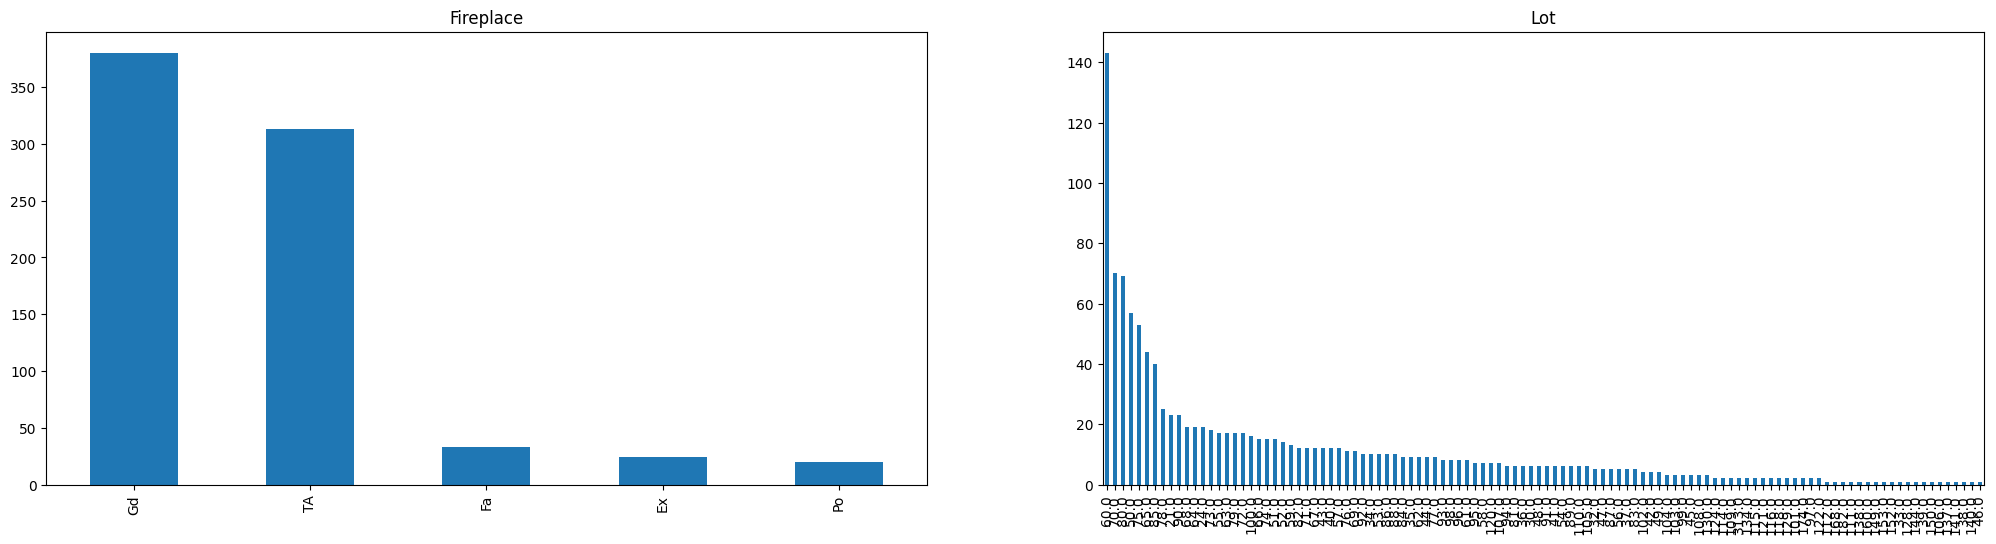

In [ ]:
# Set up a grid of plots
fizsize_with_subplots = (25,20)
fig = plt.figure(figsize=fizsize_with_subplots)
fig_dims = (3, 2)

# Plot Rooms counts
plt.subplot2grid(fig_dims, (0, 0))
housing['FireplaceQu'].value_counts().plot(kind='bar',
                                         title='Fireplace')

# Plot Type counts
plt.subplot2grid(fig_dims, (0, 1))
housing['LotFrontage'].value_counts().plot(kind='bar',
                                       title='Lot')


In [ ]:
housing['FireplaceQu'].unique()

array([nan, 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [ ]:
housing = housing.drop(['FireplaceQu'], axis=1)

In [ ]:
val_data_full = val_data_full.drop(['FireplaceQu'], axis=1)

In [ ]:
housing['LotFrontage'].unique()

array([ 65.,  80.,  68.,  60.,  84.,  85.,  75.,  nan,  51.,  50.,  70.,
        91.,  72.,  66., 101.,  57.,  44., 110.,  98.,  47., 108., 112.,
        74., 115.,  61.,  48.,  33.,  52., 100.,  24.,  89.,  63.,  76.,
        81.,  95.,  69.,  21.,  32.,  78., 121., 122.,  40., 105.,  73.,
        77.,  64.,  94.,  34.,  90.,  55.,  88.,  82.,  71., 120., 107.,
        92., 134.,  62.,  86., 141.,  97.,  54.,  41.,  79., 174.,  99.,
        67.,  83.,  43., 103.,  93.,  30., 129., 140.,  35.,  37., 118.,
        87., 116., 150., 111.,  49.,  96.,  59.,  36.,  56., 102.,  58.,
        38., 109., 130.,  53., 137.,  45., 106., 104.,  42.,  39., 144.,
       114., 128., 149., 313., 168., 182., 138., 160., 152., 124., 153.,
        46.])

In [ ]:
housing['LotFrontage'].fillna(housing['LotFrontage'].median(), inplace = True)

In [ ]:
val_data_full['LotFrontage'].fillna(val_data_full['LotFrontage'].median(), inplace = True)

In [ ]:
housing['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

**Fireplace**Q : Catagorical data so I drop it.

**LotFrontage** : For columns with numerical values, you can either use mean or median for imputation. It is ideal to use median value of the distribution is skewed.

3. Creating **new features**

Creating a column **Duration** by subtracting **YearBuilt** from **DateSold** to determine how old the house is which might be an important feature in the ML model

In [ ]:
housing['Duration'] = housing['YrSold'] - housing['YearBuilt']

In [ ]:
val_data_full['Duration'] = val_data_full['YrSold'] - val_data_full['YearBuilt']

In [ ]:
#TotalBsmtSF(Total square feet of basement area) = BsmtFinSF1(Type 1 finished square feet) + BsmtFinSF2(Type 2 finished square feet) + BsmtUnfSF(Unfinished square feet of basement area)
housing.drop(["TotalBsmtSF"], axis=1, inplace=True)
#Basement finished area
housing['BsmtFinSF'] = housing['BsmtFinSF1'] + housing['BsmtFinSF2']
housing.drop(["BsmtFinSF1"], axis=1, inplace=True)
housing.drop(["BsmtFinSF2"], axis=1, inplace=True)
#Total floor square feet
housing['TotalFlrSF'] = housing['1stFlrSF'] + housing['2ndFlrSF']

housing.drop(["1stFlrSF"], axis=1, inplace=True)
housing.drop(["2ndFlrSF"], axis=1, inplace=True)

In [ ]:
#TotalBsmtSF(Total square feet of basement area) = BsmtFinSF1(Type 1 finished square feet) + BsmtFinSF2(Type 2 finished square feet) + BsmtUnfSF(Unfinished square feet of basement area)
val_data_full.drop(["TotalBsmtSF"], axis=1, inplace=True)
#Basement finished area
val_data_full['BsmtFinSF'] = val_data_full['BsmtFinSF1'] + val_data_full['BsmtFinSF2']
val_data_full.drop(["BsmtFinSF1"], axis=1, inplace=True)
val_data_full.drop(["BsmtFinSF2"], axis=1, inplace=True)
#Total floor square feet
val_data_full['TotalFlrSF'] = val_data_full['1stFlrSF'] + val_data_full['2ndFlrSF']

val_data_full.drop(["1stFlrSF"], axis=1, inplace=True)
val_data_full.drop(["2ndFlrSF"], axis=1, inplace=True)

In [ ]:
housing['Total_Bath'] = (housing['FullBath']
        + (0.5*housing['HalfBath'])
        + housing['BsmtFullBath']
        + (0.5*housing['BsmtHalfBath']))

housing.drop(["FullBath"], axis=1, inplace=True)
housing.drop(["HalfBath"], axis=1, inplace=True)
housing.drop(["BsmtFullBath"], axis=1, inplace=True)
housing.drop(["BsmtHalfBath"], axis=1, inplace=True)

In [ ]:
val_data_full['Total_Bath'] = (val_data_full['FullBath']
        + (0.5*val_data_full['HalfBath'])
        + val_data_full['BsmtFullBath']
        + (0.5*val_data_full['BsmtHalfBath']))

val_data_full.drop(["FullBath"], axis=1, inplace=True)
val_data_full.drop(["HalfBath"], axis=1, inplace=True)
val_data_full.drop(["BsmtFullBath"], axis=1, inplace=True)
val_data_full.drop(["BsmtHalfBath"], axis=1, inplace=True)

In [ ]:
housing.info()

### 4.&nbsp;Splitting the Data

In [ ]:
# remove the Id column from both datasets
# drop the column that uniquely identifies each house
housing = housing.drop("Id", axis=1)
val_data = val_data_full.drop("Id", axis=1)

In [ ]:
X = housing.drop("SalePrice", axis=1)
y = housing["SalePrice"]

In [ ]:
#Splitting the Data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

In [ ]:
# determine the columns that will need to go to the numerical pipeline
# also determine those columns that need to go to the categorical pipeline
X_num = X.select_dtypes(include=['int64', 'float64']).columns
X_cat = X.select_dtypes(include=['object']).columns

### 5.&nbsp; Scaling/normalizing the features

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.preprocessing import OneHotEncoder
import numpy as np

In [ ]:
# numeric pipeline #StandardScaler()
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', StandardScaler()),

])

In [ ]:
# numeric pipeline #RobustScaler()
from sklearn.preprocessing import RobustScaler
num_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy="mean")),
    ('scaler', RobustScaler()),

])

In [ ]:
# categoricalal pipeline
cat_pipe = Pipeline(steps=[
    ('imputer', SimpleImputer(fill_value="missing")),
    ('encoder', OneHotEncoder(drop="first", handle_unknown="ignore"))

])

In [ ]:
from sklearn.compose import ColumnTransformer

In [ ]:
# create column transformer to do this:
# make sure (only) the numerical data goes into the num_pipe
# make sure (only) the categorical data goes into the cat_pipe
# make sure the num_pipe and the cat_pipe are being applied in parallel
# make sure that the processed data from both pipes is being combined again afterwards into a single dataset
preprocessing = ColumnTransformer(transformers=[("numeric_pipe", num_pipe, X_num),
                        ("categoric_pipe", cat_pipe, X_cat)])

In [ ]:
preprocessing

ColumnTransformer(transformers=[('numeric_pipe',
                                 Pipeline(steps=[('imputer', SimpleImputer()),
                                                 ('scaler', RobustScaler())]),
                                 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'Garage...
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object'))])

### 6.&nbsp; Model

In [ ]:
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, RFECV, SelectFromModel
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
1. # DecisionTreeRegressor
model_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('var_threshold', VarianceThreshold()),
    ('mod_feature_sel', SelectFromModel(DecisionTreeRegressor())),
    # apply different models here
    ('regressor', DecisionTreeRegressor(random_state=42))
])

In [ ]:
2. # XGBRegressor
from xgboost import XGBRegressor
model_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('var_threshold', VarianceThreshold()),
    ('mod_feature_sel', SelectFromModel(DecisionTreeRegressor())),
    # apply different models here
    ('regressor', XGBRegressor(n_estimators=1000, learning_rate=0.05, n_jobs=4, random_state=42))
])

In [ ]:
2. # XGBRegressor
from xgboost import XGBRegressor
model_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('var_threshold', VarianceThreshold()),
    ('mod_feature_sel', SelectFromModel(DecisionTreeRegressor())),
    # apply different models here
    ('regressor', XGBRegressor(n_estimators=3400,gamma=0,min_child_weight=0,nthread=4,scale_pos_weight=1,seed=27,reg_alpha=0.00006,learning_rate=0.01, n_jobs=4, random_state=42))
])

In [ ]:
3. # LassoCV
from sklearn.linear_model import LassoCV
model_pipe = Pipeline(steps=[
    ('preprocessor', preprocessing),
    ('var_threshold', VarianceThreshold()),
    ('mod_feature_sel', SelectFromModel(DecisionTreeRegressor())),
    # apply different models here
    ('regressor', LassoCV(alphas = [0.0004, 0.0005, 0.0006], random_state = 0, cv = 10))
])

In [ ]:
# DecisionTreeRegressor
param_grid = {
    'preprocessor__categoric_pipe__imputer__strategy': ['most_frequent', 'constant'],
    'var_threshold__threshold': [0, 0.01, 0.02],
    'mod_feature_sel__estimator__max_features': [None, 'auto', 'sqrt'],
    'mod_feature_sel__estimator__min_samples_leaf': [1, 2, 4]
}

In [ ]:
# For XGBRegressor
param_grid = {
    'preprocessor__categoric_pipe__imputer__strategy': ['constant'],
    'var_threshold__threshold': [0, 0.01, 0.02],
    'regressor__max_depth': [3],
    'regressor__subsample': [0.7],
    'regressor__colsample_bytree': [0.7]
}

In [ ]:
# For XGBRegressor
param_grid = {
    'preprocessor__categoric_pipe__imputer__strategy': ['constant'],
    'var_threshold__threshold': [0, 0.01, 0.02],
     'regressor__max_depth': [3, 7],
    'regressor__subsample': [0.8],
    'regressor__colsample_bytree': [0.45, 0.75]
}

In [ ]:
# For XGBRegressor
param_grid = {
    'preprocessor__categoric_pipe__imputer__strategy': ['most_frequent','constant'],
    'var_threshold__threshold': [0, 0.01, 0.02],
    'regressor__max_depth': [3, 7],
    'regressor__subsample': [0.8],
    'regressor__colsample_bytree': [0.45, 0.75]
}

In [ ]:
# For Other Regressor
param_grid = {
    'preprocessor__categoric_pipe__imputer__strategy': ['most_frequent', 'constant'],
    'var_threshold__threshold': [0, 0.01, 0.02],

}

In [ ]:
# randomized grid search + cross validation
grid_search = RandomizedSearchCV(model_pipe,
                           param_grid,
                           cv=5,
                           random_state=42,
                           verbose=2)



In [ ]:
# fit the model to the data. MAGIC!
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=   5.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=  15.9s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=  14.5s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=  14.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=  16.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=  15.5s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   5.4s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   5.1s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   4.1s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   5.8s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   5.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   5.5s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  17.9s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  17.7s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  18.8s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  18.7s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  22.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  20.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  20.4s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  23.2s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  17.8s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.5s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.3s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.9s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   4.2s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=3, regressor__subsample=0.8, var_threshold__threshold=0.01; total time=   5.2s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  22.0s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  19.7s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  23.1s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=constant, regressor__colsample_bytree=0.75, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0; total time=  18.0s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [5, 11, 12, 13, 16, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  14.1s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [13, 23] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [11] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 12, 26] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  16.4s


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [7, 11, 24] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


[CV] END preprocessor__categoric_pipe__imputer__strategy=most_frequent, regressor__colsample_bytree=0.45, regressor__max_depth=7, regressor__subsample=0.8, var_threshold__threshold=0.02; total time=  13.0s


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(transformers=[('numeric_pipe',
                                                                               Pipeline(steps=[('imputer',
                                                                                                SimpleImputer()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                                                               Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtUnfSF', 'LowQualFinSF',
       'GrLivArea', 'BedroomAbvGr...
                                                           multi_strategy=None,
                                                           n_estimators=3400,
                                                           n_jobs=4, nthread=4,
                                                           num_parallel_tree=None, ...))]),
                   param_distributions={'preprocessor__categoric_pipe__imputer__strategy': ['most_frequent',
                                                                                            'constant'],
                                        'regressor__colsample_bytree': [0.45,
                                                                        0.75],
                                        'regressor__max_depth': [3, 7],
                                        'regressor__subsample': [0.8],
                                        'var_threshold__threshold': [0, 0.01,
                                                                     0.02]},
                   random_state=42, verbose=2)

In [ ]:
prediction_train = grid_search.predict(X_train)

In [ ]:
prediction_train

array([272893.7 , 177081.58, 262587.66, ..., 250699.08, 132044.78,
       139577.25], dtype=float32)

In [ ]:
prediction_test = grid_search.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [12, 28] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
prediction_test

array([221948.52 , 126433.81 , 155056.97 , 245205.36 , 159649.98 ,
       264890.88 , 324849.34 , 130070.08 , 145982.02 , 128705.445,
       158057.22 , 244680.98 , 148521.92 , 108106.34 , 233074.06 ,
       155495.58 , 151583.25 , 342916.75 , 232173.05 , 154030.39 ,
       146197.08 , 178317.62 , 101528.35 , 142052.22 , 224290.08 ,
       147725.47 , 207357.62 , 201258.42 , 131810.1  , 153551.9  ,
       124444.55 , 200734.75 , 148384.77 , 207260.62 , 378333.44 ,
       202401.55 , 164473.9  , 382528.47 , 169642.78 ,  93073.2  ,
       131100.2  , 225037.1  , 199840.55 , 167874.61 , 200043.8  ,
       109140.11 , 272818.53 , 231783.1  , 241365.06 , 104497.53 ,
       198856.38 , 187185.72 , 147360.   , 164113.8  , 106622.77 ,
       166484.2  , 131114.6  , 167646.56 , 221475.4  , 355805.25 ,
        90913.49 , 336973.   , 176784.23 , 161995.89 , 222958.5  ,
       137502.05 , 116092.38 , 221750.1  , 231492.55 , 136699.92 ,
       147939.9  , 221569.55 , 162799.77 , 255838.78 , 191830.

### 7.&nbsp; R2 Score

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
performance_train = r2_score(y_true = y_train, y_pred=prediction_train)

In [ ]:
performance_train

0.97587121924691

In [ ]:
prediction_test = r2_score(y_test, prediction_test)

In [ ]:
prediction_test

0.8854708197403403

### 8.&nbsp; Kaggle

In [ ]:
# make a prediction with the validation data from kaggle
prediction_val = grid_search.predict(val_data)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:202: UserWarning: Found unknown categories in columns [0, 12, 13, 27, 28, 35] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


In [ ]:
prediction_val

array([129775.234, 162483.23 , 184018.66 , ..., 174639.45 , 124214.97 ,
       227155.06 ], dtype=float32)

In [ ]:
# add the predictions as a new column to the full validations df

In [ ]:
val_data_full["SalePrice"] = prediction_val

In [ ]:
val_data_full

Id  MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour  \
0     1461          20       RH         80.0    11622      Reg         Lvl   
1     1462          20       RL         81.0    14267      IR1         Lvl   
2     1463          60       RL         74.0    13830      IR1         Lvl   
3     1464          60       RL         78.0     9978      IR1         Lvl   
4     1465         120       RL         43.0     5005      IR1         HLS   
5     1466          60       RL         75.0    10000      IR1         Lvl   
6     1467          20       RL         67.0     7980      IR1         Lvl   
7     1468          60       RL         63.0     8402      IR1         Lvl   
8     1469          20       RL         85.0    10176      Reg         Lvl   
9     1470          20       RL         70.0     8400      Reg         Lvl   
10    1471         120       RH         26.0     5858      IR1         Lvl   
11    1472         160       RM         21.0     1680      Reg         Lvl   
12    1473         160       RM         21.0     1680      Reg         Lvl   
13    1474         160       RL         24.0     2280      Reg         Lvl   
14    1475         120       RL         24.0     2280      Reg         Lvl   
15    1476          60       RL        102.0    12858      IR1         Lvl   
16    1477          20       RL         94.0    12883      IR1         Lvl   
17    1478          20       RL         90.0    11520      Reg         Lvl   
18    1479          20       RL         79.0    14122      IR1         Lvl   
19    1480          20       RL        110.0    14300      Reg         HLS   
20    1481          60       RL        105.0    13650      Reg         Lvl   
21    1482         120       RL         41.0     7132      IR1         Lvl   
22    1483          20       RL        100.0    18494      IR1         Lvl   
23    1484         120       RL         43.0     3203      Reg         Lvl   
24    1485          80       RL         67.0    13300      IR1         Lvl   
25    1486          60       RL         63.0     8577      IR1         Lvl   
26    1487          60       RL         60.0    17433      IR2         Lvl   
27    1488          20       RL         73.0     8987      Reg         Lvl   
28    1489          20       FV         92.0     9215      Reg         Lvl   
29    1490          20       FV         84.0    10440      Reg         Lvl   
30    1491          60       RL         70.0    11920      Reg         Lvl   
31    1492          30       RH         70.0     9800      Reg         Lvl   
32    1493          20       RL         39.0    15410      IR1         Lvl   
33    1494          60       RL         85.0    13143      IR1         Lvl   
34    1495          60       RL         88.0    11134      Reg         Lvl   
35    1496         120       FV         25.0     4835      IR1         Lvl   
36    1497         160       FV         39.0     3515      Reg         Lvl   
37    1498         160       FV         30.0     3215      Reg         Lvl   
38    1499         160       FV         24.0     2544      Reg         Lvl   
39    1500         160       FV         24.0     2544      Reg         Lvl   
40    1501         160       FV         67.0     2980      Reg         Lvl   
41    1502         160       FV         67.0     2403      IR1         Lvl   
42    1503          20       FV         57.0    12853      IR1         Lvl   
43    1504          60       FV         68.0     7379      IR1         Lvl   
44    1505          20       FV         80.0     8000      Reg         Lvl   
45    1506          20       RL         67.0    10456      IR1         Lvl   
46    1507          60       RL         80.0    10791      Reg         Lvl   
47    1508          50       RL         67.0    18837      IR1         Lvl   
48    1509          60       RL         80.0     9600      Reg         Lvl   
49    1510          20       RL         80.0     9600      Reg         Lvl   
50    1511          20       R

In [ ]:
submission = val_data_full[["Id", "SalePrice"]]

In [ ]:
submission.to_csv("submission.csv", index=False)

In [ ]:
# only needed for csv downloads from google colab
from google.colab import files
files.download("submission.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>